In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ftplib import FTP
import gzip
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [2]:
# load data
df = pd.read_csv("./data_set_ALL_AML_train.csv")
df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [3]:
# reset index so the first column has a name 
#df = df.groupby('Gene Description').mean()
df.set_index('Gene Accession Number', inplace=True, drop=True)


In [4]:
df.head()

,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,AFFX-BioB-5_at (endogenous control),-214,A,-139,A,-76,A,-135,A,-106,...,15,A,-318,A,-32,A,-124,A,-135,A
AFFX-BioB-M_at,AFFX-BioB-M_at (endogenous control),-153,A,-73,A,-49,A,-114,A,-125,...,-114,A,-192,A,-49,A,-79,A,-186,A
AFFX-BioB-3_at,AFFX-BioB-3_at (endogenous control),-58,A,-1,A,-307,A,265,A,-76,...,2,A,-95,A,49,A,-37,A,-70,A
AFFX-BioC-5_at,AFFX-BioC-5_at (endogenous control),88,A,283,A,309,A,12,A,168,...,193,A,312,A,230,P,330,A,337,A
AFFX-BioC-3_at,AFFX-BioC-3_at (endogenous control),-295,A,-264,A,-376,A,-419,A,-230,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
# dropping all rows with instances of "(endogenous control)" from the index column
df_new = df[~df['Gene Description'].str.contains(pat='(endogenous control)')]
df_new.head()

/miniconda3/envs/fall_2019/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
hum_alu_at,hum_alu_at (miscellaneous control),15091,P,11038,P,16692,P,15763,P,18128,...,26052,P,11983,P,23508,P,17996,P,19679,P
A28102_at,GB DEF = GABAa receptor alpha-3 subunit,151,A,263,P,88,A,484,A,118,...,318,A,382,M,486,P,388,A,260,A
AB000114_at,Osteomodulin,72,A,21,A,-27,A,61,A,16,...,1,A,1,A,-23,A,56,A,-27,A
AB000115_at,mRNA,281,A,250,P,358,P,118,A,197,...,103,A,239,P,221,A,405,P,1306,P
AB000220_at,Semaphorin E,36,A,43,A,42,A,39,A,39,...,-61,A,72,A,39,A,192,P,32,A


In [6]:
# dropping all rows with instances of "(miscellaneous control)" from the index column
df_new = df_new[~df_new['Gene Description'].str.contains(pat='(miscellaneous control)')]
df_new.head()

,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,GB DEF = GABAa receptor alpha-3 subunit,151,A,263,P,88,A,484,A,118,...,318,A,382,M,486,P,388,A,260,A
AB000114_at,Osteomodulin,72,A,21,A,-27,A,61,A,16,...,1,A,1,A,-23,A,56,A,-27,A
AB000115_at,mRNA,281,A,250,P,358,P,118,A,197,...,103,A,239,P,221,A,405,P,1306,P
AB000220_at,Semaphorin E,36,A,43,A,42,A,39,A,39,...,-61,A,72,A,39,A,192,P,32,A
AB000409_at,MNK1,-299,A,-103,A,142,P,-11,A,237,...,39,A,377,P,-14,M,-31,A,-349,A


In [7]:
# drop gene description column since it is not useful right now
df_new = df_new.drop(columns=['Gene Description'])

In [8]:
df_new.head()

,1,call,2,call.1,3,call.2,4,call.3,5,call.4,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,151,A,263,P,88,A,484,A,118,P,...,318,A,382,M,486,P,388,A,260,A
AB000114_at,72,A,21,A,-27,A,61,A,16,A,...,1,A,1,A,-23,A,56,A,-27,A
AB000115_at,281,A,250,P,358,P,118,A,197,M,...,103,A,239,P,221,A,405,P,1306,P
AB000220_at,36,A,43,A,42,A,39,A,39,A,...,-61,A,72,A,39,A,192,P,32,A
AB000409_at,-299,A,-103,A,142,P,-11,A,237,P,...,39,A,377,P,-14,M,-31,A,-349,A


In [11]:
# find all instances of NA values
print('NA values in DF:', df_new.isna().sum().sum())

# No NA values

NA values in DF: 0


In [13]:
# drop the columns with 'call' as these are not needed right now. just need the numbered columns
df_norm = df_new.loc[:]
df_norm= df_norm[df_norm.columns.drop(list(df_norm.filter(regex='call')))]

# normalize data using equation Mark sent us 
df_norm = df_norm.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
df_norm.head()


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,-0.682736,-0.067116,-1.029022,1.147633,-0.864124,-0.028640,1.004722,3.280316,-1.171934,-0.446382,...,1.087171,-1.237893,-0.144069,0.449564,-0.468369,0.235197,0.586980,1.158627,0.619959,-0.083606
AB000114_at,0.787202,-0.177755,-1.085950,0.579074,-0.272359,1.033171,-0.764298,-0.102072,-1.294078,0.654757,...,-0.575090,-1.237316,0.106056,-0.896743,0.162818,-0.556170,-0.556170,-1.010267,0.484470,-1.085950
AB000115_at,-0.077934,-0.151262,0.104203,-0.463497,-0.276629,-0.574671,-0.345226,-0.042453,-0.274264,-0.475324,...,0.063991,-0.567575,0.033240,-0.567575,-0.236417,-0.498978,-0.177282,-0.219859,0.215377,2.346616
AB000220_at,-0.017084,0.151228,0.127183,0.055049,0.055049,-0.113263,-0.642243,0.535941,-0.233486,0.055049,...,-1.051001,0.055049,-0.594154,0.343584,0.824476,-2.349409,0.848521,0.055049,3.733870,-0.113263
AB000409_at,-1.688585,-0.627628,0.698568,-0.129628,1.212807,-0.676346,0.400850,-2.884868,0.731046,-0.205411,...,-0.952411,2.290003,-0.844150,0.406263,-0.351563,0.141024,1.970633,-0.145867,-0.237889,-1.959237


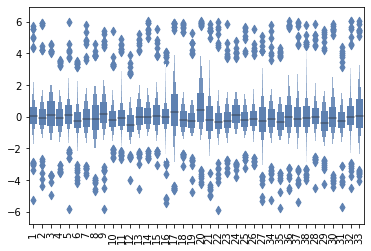

In [14]:
# create a boxplot of normalized data
sns.boxenplot(data=df_norm, color='#507fbf')
_ = plt.xticks(rotation=90)

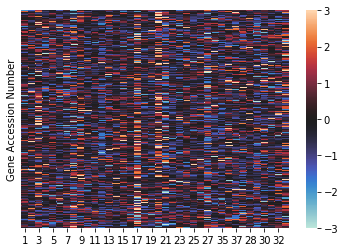

In [15]:
# create heatmap
sns.heatmap(data=df_norm, vmax=3, vmin=-3, center=0, yticklabels=False)

In [16]:
# extract ALL samples
ALL_samples = []
for i in range (1,27):
    ALL_samples.append('{}'.format(i))

ALL_samples

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26']

In [17]:
# extract AML samples
AML_samples = []
for i in range (27,38):
    AML_samples.append('{}'.format(i))
AML_samples

['27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']

In [18]:
df_norm[['ALL_mean', 'ALL_std']] = df_norm[ALL_samples].agg(['mean', 'std'], axis=1)
df_norm[['AML_mean', 'AML_std']] = df_norm[AML_samples].agg(['mean', 'std'], axis=1)
df_norm.head()


,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,ALL_mean,ALL_std,AML_mean,AML_std
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,-0.682736,-0.067116,-1.029022,1.147633,-0.864124,-0.028640,1.004722,3.280316,-1.171934,-0.446382,...,-0.468369,0.235197,0.586980,1.158627,0.619959,-0.083606,-0.139418,1.110006,0.288664,0.746532
AB000114_at,0.787202,-0.177755,-1.085950,0.579074,-0.272359,1.033171,-0.764298,-0.102072,-1.294078,0.654757,...,0.162818,-0.556170,-0.556170,-1.010267,0.484470,-1.085950,0.153357,1.104053,-0.280959,0.724066
AB000115_at,-0.077934,-0.151262,0.104203,-0.463497,-0.276629,-0.574671,-0.345226,-0.042453,-0.274264,-0.475324,...,-0.236417,-0.498978,-0.177282,-0.219859,0.215377,2.346616,0.007221,1.117886,0.034531,0.801354
AB000220_at,-0.017084,0.151228,0.127183,0.055049,0.055049,-0.113263,-0.642243,0.535941,-0.233486,0.055049,...,0.824476,-2.349409,0.848521,0.055049,3.733870,-0.113263,-0.159502,0.465841,0.345770,1.745857
AB000409_at,-1.688585,-0.627628,0.698568,-0.129628,1.212807,-0.676346,0.400850,-2.884868,0.731046,-0.205411,...,-0.351563,0.141024,1.970633,-0.145867,-0.237889,-1.959237,-0.032402,0.938924,0.039652,1.255026


In [19]:
# define welch's t-test
def welch_t_test(row):
    return (
        (row['ALL_mean'] - row['AML_mean']) / 
        np.sqrt(
            row['ALL_std']/len(ALL_samples) + row['AML_std']/len(AML_samples)
        )
    )
# only apply t-test to applicable columns
df_norm['similarity'] = df_norm[['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std']].apply(welch_t_test, axis=1)
df_norm.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,ALL_mean,ALL_std,AML_mean,AML_std,similarity
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,-0.682736,-0.067116,-1.029022,1.147633,-0.864124,-0.028640,1.004722,3.280316,-1.171934,-0.446382,...,0.235197,0.586980,1.158627,0.619959,-0.083606,-0.139418,1.110006,0.288664,0.746532,-1.287448
AB000114_at,0.787202,-0.177755,-1.085950,0.579074,-0.272359,1.033171,-0.764298,-0.102072,-1.294078,0.654757,...,-0.556170,-0.556170,-1.010267,0.484470,-1.085950,0.153357,1.104053,-0.280959,0.724066,1.319826
AB000115_at,-0.077934,-0.151262,0.104203,-0.463497,-0.276629,-0.574671,-0.345226,-0.042453,-0.274264,-0.475324,...,-0.498978,-0.177282,-0.219859,0.215377,2.346616,0.007221,1.117886,0.034531,0.801354,-0.080238
AB000220_at,-0.017084,0.151228,0.127183,0.055049,0.055049,-0.113263,-0.642243,0.535941,-0.233486,0.055049,...,-2.349409,0.848521,0.055049,3.733870,-0.113263,-0.159502,0.465841,0.345770,1.745857,-1.202242
AB000409_at,-1.688585,-0.627628,0.698568,-0.129628,1.212807,-0.676346,0.400850,-2.884868,0.731046,-0.205411,...,0.141024,1.970633,-0.145867,-0.237889,-1.959237,-0.032402,0.938924,0.039652,1.255026,-0.185915


In [20]:
# discard the last 5 columns created to plot heatmap
df_sorted = df_norm.sort_values('similarity').drop(columns=['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std', 'similarity'])
#df_sorted = df_sorted.groupby(df_sorted.index).mean()


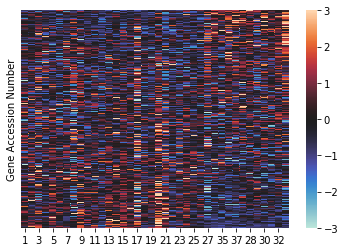

In [21]:
# plot heatmap of all genes. Can start to see pattern (more red in upper right and lower left samples)
sns.heatmap(data=df_sorted, vmax=3, vmin=-3, center=0, yticklabels=False)

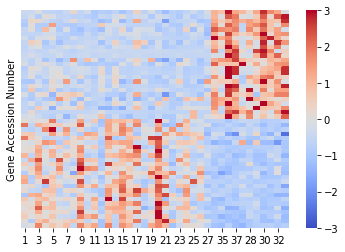

In [22]:
# plot top 25 genes of each sample in heatmap
df_features = df_sorted.head(25).append(df_sorted.tail(25))
sns.heatmap(data=df_features, vmax=3, vmin=-3, center=0, yticklabels=False, cmap='coolwarm')

# Question 2: Prediction Model

### Importing necessary libraries

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [24]:
X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)
print(df_features.shape)
print(train_labels.shape)

(150, 4)
(150,)
(50, 38)


NameError: name 'train_labels' is not defined

### Loading label data

In [25]:
labels = pd.read_csv('cleaned_ALL_AML_labels.tsv', sep='\t')
#add 0s to single digits for sorting
cleaned_samples = []
for samplenum in labels['Sample']:
    cleaned_samples.append(('0' + str(samplenum))[-2:])
    
labels['Sample'] = cleaned_samples

train_labels = labels.iloc[:38, :]
train_labels

,Sample,Label
0,01,ALL
1,02,ALL
2,03,ALL
3,04,ALL
4,05,ALL
5,06,ALL
6,07,ALL
7,08,ALL
8,09,ALL
9,10,ALL


## Training a logistical regressor

In [26]:
#Sorting columns to be in numerical order

new_cols = []
for column in df_features.columns:
    if(len(column) == 1):
        new_cols.append('0' + column)
    else:
        new_cols.append(column)
df_features.columns = new_cols
df_features = df_features.reindex(sorted(df_features.columns), axis=1)
df_features

,01,02,03,04,05,06,07,08,09,10,...,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,-0.360132,-0.431601,-0.044289,-0.569927,-0.586065,-0.685198,-0.426990,0.266945,-0.542261,-0.301344,...,1.277875,2.745282,1.736656,1.266348,-0.073106,1.113037,0.807568,2.914731,1.270959,0.979322
M16038_at,-0.508185,-0.199314,-0.814672,0.097633,-0.125375,-0.583316,-0.555888,-0.652484,-0.617900,-0.771740,...,0.612816,2.269275,0.282479,2.252579,2.900137,1.052869,-0.066940,2.308629,1.917471,-0.008505
M55150_at,-0.790243,0.306325,0.311555,-0.335228,-0.654261,-0.725739,-0.443316,0.227874,-0.497360,-0.387529,...,0.940905,1.751563,0.780517,0.709039,2.764450,1.226815,0.520757,1.045506,1.681829,1.125700
X17042_at,-0.921548,0.071034,-0.849288,-0.856545,1.435191,-0.794565,-0.853219,-0.932734,-0.718678,-0.644302,...,1.703367,2.351583,0.793324,0.010264,1.702157,1.600269,0.121827,2.230647,1.588477,-0.586555
D49950_at,-0.487368,0.048006,-0.794712,0.930382,-0.140366,-0.903770,-0.090794,-0.913684,-1.141714,-0.695569,...,0.652781,2.001131,0.722181,1.336870,-0.239509,2.288646,1.693786,1.574814,1.852415,-0.536940
X95735_at,-0.560038,-0.553935,-0.552579,-0.292181,-0.278618,-0.594622,-0.726856,-0.907914,-0.913339,-0.428483,...,1.508229,3.454435,0.287612,1.473645,1.599097,1.236303,-0.050092,2.535582,1.009133,0.371021
M23197_at,-0.245261,-0.704370,-0.107528,-0.167786,0.139243,-0.827756,-0.753150,-0.273955,-0.549421,-0.514987,...,0.598352,2.248275,2.845117,1.226758,0.276976,3.166493,1.246844,1.789166,0.176546,-0.205089
U67963_at,-0.538314,0.511874,0.218318,-0.966245,-0.468026,-1.113023,-0.633410,-0.672688,-0.542448,-0.426680,...,-0.170335,2.829317,-0.066970,2.655664,1.562062,0.908796,0.133558,2.165714,0.919132,-0.354324
M63138_at,-0.605018,-0.229722,-0.039408,-0.719043,-0.662851,-0.422907,-0.061556,-0.378610,0.006120,-0.422497,...,-0.134155,2.423192,0.715697,1.840765,-0.046791,1.108219,0.419971,3.885412,1.739045,-0.250230


In [27]:
#converting dfs to proper format for modeling
###for generating the train_x and train_y the following are needed:
#train_x: a matrix where the samples (1-38) are the rows and the genes (top 25 of ALL and AML) are the columns 
#to do this I took the transpose of the df_features and extracted the raw values
train_X = df_features.T.values
#for train_y the labels need to be represented with integers - since this is a binary classification, I did a simple binary substitution
train_y = train_labels['Label'].apply(lambda x: 0 if x == 'ALL' else 1).values
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
###IGNORE THESE
#creating the regressor
#clf = LogisticRegression(random_state=0, solver='liblinear',multi_class='auto').fit(train_X, train_y)
#clf = nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(train_X)

##creating the neural net
clf = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(5000, 200), random_state=1)
clf.fit(train_X, train_y)       
guesses = clf.predict(train_X)

correct = 0
for i in range(len(guesses)):
    if(guesses[i] == train_y[i]):
        correct +=1 
print(correct/len(guesses))

1.0


## Evaluating the model

In [29]:
#preparing test data

test_data = pd.read_csv('data_set_ALL_AML_independent.tsv', sep='\t', index_col = 1)
test = test_data.loc[list(df_features.index)]
test= test[test.columns.drop(list(test.filter(regex='call')))].iloc[:, 1:]
#test = test.groupby(test.index).mean() #collapsing duplicate gene rows into means
test = test.reindex(sorted(test.columns), axis=1)

test.head()

,39,40,41,42,43,44,45,46,47,48,...,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,1122,1016,428,64,646,188,470,591,1141,769,...,2502,3190,2349,775,993,1049,1496,682,931,1029
M16038_at,164,797,491,265,223,252,87,173,313,178,...,2686,1499,716,460,1448,462,505,426,190,406
M55150_at,627,503,181,1565,1165,441,309,385,767,927,...,1476,3220,610,749,654,859,623,360,310,665
X17042_at,33,1269,1183,1045,7064,155,1327,283,2450,1537,...,5178,6311,5086,3340,4401,2282,2128,348,1128,1357
D49950_at,214,234,-4,35,43,97,142,80,191,51,...,250,455,218,65,53,145,84,12,105,146


In [30]:
#preparing test X and y and running the model

test_X = test.T.values
test_y = labels['Label'].iloc[38:].apply(lambda x: 0 if x == 'ALL' else 1).values
print(test_X)
print(test_y.shape)



[[1122  164  627 ...  475 2037 4646]
 [1016  797  503 ...  251 1497 2141]
 [ 428  491  181 ...  616 4240 3686]
 ...
 [ 682  426  360 ...  348 2178 2962]
 [ 931  190  310 ...  218  306 1076]
 [1029  406  665 ...  493 1374 3102]]
(34,)


In [31]:
correct = 0
test_guess = clf.predict(test_X)
for i in range(len(test_guess)):
    if(test_guess[i] == test_y[i]):
        correct +=1 
print("Correct predictions: {}%".format(round(correct/len(test_y) * 100)))
print(test_guess)


Correct predictions: 94%
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0]


In [41]:
# ##Just curious...
# #creating the regressor
# #clf = LogisticRegression(random_state=0, solver='liblinear',multi_class='auto').fit(train_X, train_y)
# #clf = nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(train_X)

#train_X2 = df_norm.iloc[1:, :-5].T.values
#clf = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(5000, 20), random_state=1)
#clf.fit(train_X2, train_y)       
#guesses = clf.predict(train_X2)
#distances, guesses = nbrs.kneighbors(train_X)
#print(guesses)
# #  

## correct = 0
## for i in range(len(guesses)):
##    if(guesses[i] == train_y[i]):
##        correct +=1 
# print(correct/len(guesses))

[[ 0  7]
 [ 1  9]
 [ 2  8]
 [ 3  6]
 [ 4 13]
 [ 5  9]
 [ 6 17]
 [ 7 26]
 [ 8  2]
 [ 9 10]
 [10  9]
 [11 26]
 [12 14]
 [13 23]
 [14 12]
 [15 23]
 [16  2]
 [17 26]
 [18 15]
 [19  8]
 [20 23]
 [21 25]
 [22  5]
 [23 15]
 [24 25]
 [25  9]
 [26 17]
 [27 34]
 [28 30]
 [29 31]
 [30 33]
 [31 33]
 [32 36]
 [33 30]
 [34 30]
 [35 36]
 [36 32]
 [37 34]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# #test_data = pd.read_csv('data_set_ALL_AML_independent.tsv', sep='\t', index_col = 1)
# #test = test_data.loc[list(df_norm.iloc[1:,:].index.values)]
# #test= test[test.columns.drop(list(test.filter(regex='call')))].iloc[:, 1:]
# #test = test.groupby(test.index).mean() #collapsing duplicate gene rows into means
# #test = test.reindex(sorted(test.columns), axis=1)
# X = pd.concat([df_features, test], axis=1, sort=False).T.values
# y = labels['Label'].apply(lambda x: 0 if x == 'ALL' else 1).values


## Cross Validation

In [34]:
#This is how cross validation works: CLF is the classifier, test_X and test_Y are the data and labels for the test st, and cv is the number of folds
##I'm not entirely sure about the chosen cv number; perhaps less would be better?
score = cross_val_score(clf, test_X, test_y, cv=10)


In [35]:
print("Cross Validation Scores: {}".format(score))
print('Mean Cross Validation Score: {}%'.format(round(score.mean() * 100)))

Cross Validation Scores: [1.         1.         1.         1.         0.66666667 1.
 1.         0.33333333 1.         0.66666667]
Mean Cross Validation Score: 87.0%


In [36]:
predict = clf.predict(test_X)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test_y, predict )
roc_auc = auc(fpr, tpr)
print("Area Under the Curve: {}%".format(round(roc_auc * 100)))

Area Under the Curve: 94.0%


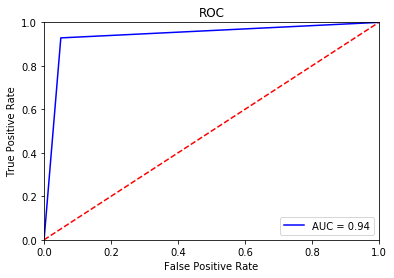

In [38]:
# plot ROC curve
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()